# Building a Stock Database

Well,  you have to round it.

In [181]:
from datetime import date
import numpy as np
from matplotlib import finance, dates
from yahoo_finance import Share
import yahoo_finance as yahoo
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as m_dates
%matplotlib inline

In [202]:
def precisionRound(n):
    '''Rounds to architecture floating point precision'''
    return round(n, np.finfo(float).precision)
def returnQuotes(symbol):
    today = date.today()
    start = (today.year -1, today.month, today.day)
    example_stock = Share(symbol)
    start = str(start[0])+'-'+str(start[1])+'-'+str(start[2])
    today = str(today.year) + '-' + str(today.month) + '-' + str(today.day)
    years_data = example_stock.get_historical(start,today)
    alldays = dates.DayLocator()
    months = dates.MonthLocator()
    quotes = [(finance.date2num(datetime.datetime.strptime(
                    e['Date'], '%Y-%m-%d')), float(e['Open']), 
               float(e['Close']), float(e['High']), float(e['Low']), float(e['Volume'])) for e in years_data]
    return np.array(quotes)
def plotStockYearShaded(symbol):
    alldays = m_dates.DayLocator()
    months = m_dates.MonthLocator()
    data = Share(symbol)
    today = datetime.date.today()
    start = (today.year -1, today.month, today.day)
    start = str(start[0])+'-'+str(start[1])+'-'+str(start[2])
    today = str(today.year) + '-' + str(today.month) + '-' + str(today.day)
    test_data = data.get_historical(start,today)
    dates = [e['Date'] for e in test_data]
    closes = [e['Close'] for e in test_data]
    closes = np.array(closes).astype(float)
    dates = [finance.date2num(datetime.datetime.strptime(
                    date, '%Y-%m-%d')) for date in dates]
    deviation = np.subtract(closes, round(np.mean(np.array(closes)), 3))
    vol = np.sum(deviation)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    if vol > 0:
        ax.plot(dates,closes, lw=1.5, c='g', label=symbol)
    else:
        ax.plot(dates,closes, lw=1.5, c='r', label=symbol)
    month_formatter = m_dates.DateFormatter('%b %Y')
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_minor_locator(alldays)
    ax.xaxis.set_major_formatter(month_formatter)
    plt.fill_between(dates, closes.min(), closes, where=closes>closes.mean(), facecolor="blue", alpha=0.4)
    plt.fill_between(dates, closes.min(), closes, where=closes<closes.mean(), facecolor="grey", alpha=0.4)
    plt.legend(loc=0)
    fig.autofmt_xdate()
    plt.suptitle('{} Annual Summary'.format(symbol), fontsize=12)
    return deviation, vol

A list of Stock symbols was downloaded from NASDAQ using the following link:  
http://nasdaq.com/screening/company-list.aspx  

In [4]:
data = pd.read_csv('./data/companylist.csv')

In [5]:
data.keys()

Index(['Symbol', 'Name', 'LastSale', 'MarketCap', 'IPOyear', 'Sector',
       'industry', 'Summary Quote', 'Unnamed: 8'],
      dtype='object')

In [6]:
data.drop('Unnamed: 8', axis=1, inplace=True)

In [7]:
data['averagePrice'] = None
data['volatility'] = None

In [8]:
data.head(3)

,Symbol,Name,LastSale,MarketCap,IPOyear,Sector,industry,Summary Quote,averagePrice,volatility
0,FLWS,"1-800 FLOWERS.COM, Inc.",9.35,$611.79M,1999,Consumer Services,Other Specialty Stores,http://www.nasdaq.com/symbol/flws,None,None
1,SRCE,1st Source Corporation,35.04,$906.38M,n/a,Finance,Major Banks,http://www.nasdaq.com/symbol/srce,None,None
2,VNET,"21Vianet Group, Inc.",9.31,$1.06B,2011,Technology,"Computer Software: Programming, Data Processing",http://www.nasdaq.com/symbol/vnet,None,None


In [9]:
industries = list(set(data['industry']))

In [10]:
industries[:10]

['Specialty Chemicals',
 'Property-Casualty Insurers',
 'Package Goods/Cosmetics',
 'Ordnance And Accessories',
 'Computer Communications Equipment',
 'Medical/Dental Instruments',
 'Mining & Quarrying of Nonmetallic Minerals (No Fuels)',
 'Hotels/Resorts',
 'Building operators',
 'Finance/Investors Services']

In [11]:
def companiesForIndustry(industry, data):
    names = data['Name']
    symbols = data['Symbol']
    industries = data['industry']
    return [(c,_) for (c,_, __) in list(zip(names,symbols,industries)) if __ == industry]

In [12]:
pro = companiesForIndustry('Professional Services', data)

In [13]:
pro

[('Barrett Business Services, Inc.', 'BBSI'),
 ('Cross Country Healthcare, Inc.', 'CCRN'),
 ('Exponent, Inc.', 'EXPO'),
 ('Hudson Global, Inc.', 'HSON'),
 ('Huron Consulting Group Inc.', 'HURN'),
 ('ICF International, Inc.', 'ICFI'),
 ('Kelly Services, Inc.', 'KELYA'),
 ('Kelly Services, Inc.', 'KELYB'),
 ('Kforce, Inc.', 'KFRC'),
 ('TeleTech Holdings, Inc.', 'TTEC'),
 ('The Hackett Group, Inc.', 'HCKT'),
 ('The RMR Group Inc.', 'RMR')]

In [205]:
today = date.today()
start = (today.year -1, today.month, today.day)
start = str(start[0])+'-'+str(start[1])+'-'+str(start[2])
today = str(today.year) + '-' + str(today.month) + '-' + str(today.day)
for c in pro:
    test = Share(c[1])
    test_data = test.get_historical(start, today)
    closes = np.array([round(float(c['Close']),5) for c in test_data])
    mean = round(np.mean(closes), 5)
    deviation = np.subtract(closes, mean)
    vol = round(np.nansum(deviation), 5)
    print(c[1],mean, vol)

BBSI 38.42352 -0.00056
CCRN 13.95094 0.00124
EXPO 50.3187 0.0002
HSON 2.4026 -0.0004
HURN 58.57697 -0.00038
ICFI 36.17386 -0.00044
KELYA 17.47142 -0.00068
KELYB 17.09016 -0.00064
KFRC 21.31567 -0.00018
TTEC 27.73327 -0.00058
HCKT 15.00346 0.00116
RMR 26.51404 -0.00028


**Right here with the BBSI data an error occurs if the mean is rounded to any precision higher than 1**

In [206]:
test = Share('BBSI')
test_data = test.get_historical(start, today)
closes = np.array([round(float(c['Close']),5) for c in test_data])
mean = round(np.mean(closes), 2)
deviation = np.subtract(closes, mean)
vol = round(np.nansum(deviation), 5)

In [207]:
mean

38.460000000000001

In [208]:
vol

0.63

In [209]:
closes[0]

48.32

In [210]:
deviation

array([  9.86000000e+00,   9.03000000e+00,   8.20000000e+00,
         8.93000000e+00,   9.11000000e+00,   9.16000000e+00,
         9.75000000e+00,   8.40000000e+00,   8.33000000e+00,
         8.00000000e+00,   8.58000000e+00,   8.82000000e+00,
         7.98000000e+00,   7.70000000e+00,   8.00000000e+00,
         6.72000000e+00,   6.11000000e+00,   5.87000000e+00,
         5.73000000e+00,   5.52000000e+00,   6.00000000e+00,
         4.64000000e+00,   5.13000000e+00,   4.70000000e+00,
         4.07000000e+00,   4.52000000e+00,   4.09000000e+00,
         4.31000000e+00,   5.03000000e+00,   4.43000000e+00,
         5.04000000e+00,   4.78000000e+00,   4.32000000e+00,
         3.29000000e+00,   3.75000000e+00,   3.57000000e+00,
         4.42000000e+00,   4.79000000e+00,   3.43000000e+00,
         3.19000000e+00,   3.12000000e+00,   2.23000000e+00,
         1.48000000e+00,   7.90000000e-01,   1.34000000e+00,
         2.86000000e+00,   7.00000000e-01,  -1.00000000e-01,
        -3.70000000e-01,

In [69]:
test = Share('BBSI')
test_data = test.get_historical(start, today)
closes = np.array([round(float(c['Close']),5) for c in test_data])
mean = round(np.mean(closes), 1)
deviation = np.subtract(closes, mean)
vol = round(np.nansum(deviation), 1)

In [70]:
mean

38.5

In [71]:
vol

-9.5

In [72]:
closes[0]

48.32

In [73]:
deviation[:10]

array([ 9.82,  8.99,  8.16,  8.89,  9.07,  9.12,  9.71,  8.36,  8.29,  7.96])

In [154]:
def deviationCalculations_Smashed(quotes):
    '''Return the annual deviation from mean close price'''
    quotes = np.array(quotes)
    mean_value = np.mean(quotes.T[1])
    deviation = np.subtract(quotes.T[1], round(np.mean(quotes.T[1]), 5))
    total_fluctuation = round(np.sum(deviation), 5)
    #Any more than 5 results in a precision failure of some sort
    return(mean_value, deviation, total_fluctuation)
def deviationCalculations(quotes):
    #closes = [round(float(c['Close']),3) for c in quotes]
    closes = np.round(quotes.T[1], 3)
    mean_value = round(np.mean(closes), 3)
    mean_value = np.round(mean_value, 2)
    deviation = np.subtract(closes, mean_value)
    total_fluctuation = round(np.nansum(deviation), 3)
    return(mean_value, deviation, total_fluctuation)

In [166]:
def updateIndustryVolatility(industry_set,data):
    for company in industry_set:
        try:
            #print(company[1])
            c_data = np.array(returnQuotes(company[1]))
            mean_value, deviation_array, volatility = deviationCalculations(c_data)
            #print('Company      : {}'.format(company[0]))
            #print('Symbol       : {}'.format(company[1]))
            #print('Average Price: {}'.format(mean_value))
            #print('volatility  : {}'.format(volatility))
            data.loc[data.Symbol == str(company[1]), 'volatility'] = volatility
            data.loc[data.Symbol == str(company[1]), 'averagePrice'] = mean_value
        except:
            print('Could not retrieve {}'.format(company[1]))
def updateDataVolatility(industries, data):
    for industry in industries:
        print(industry)
        updateIndustryVolatility(companiesForIndustry(industry, data), data)
def topAnnuallyStableCompaniesByIndustry(num, industry, data):
    performers = data.loc[data.industry == industry]
    result = performers.sort('volatility', ascending=False)
    return result.head(num)
def industryAnnualAccounts(industry, data):
    subset = data.loc[data.industry == industry]
    return subset.loc[subset.volatility > 0]

In [156]:
c_data = returnQuotes('BBSI')
mean_value, deviation_array, volatility = deviationCalculations(c_data)

In [157]:
closes = np.round(c_data.T[1], 3)

In [158]:
closes[1]

46.850000000000001

In [159]:
c_data[0]

array([  7.36209000e+05,   4.75299990e+01,   4.83200000e+01,
         4.86699980e+01,   4.73499980e+01,   7.96000000e+04])

In [160]:
mean_value

38.340000000000003

In [161]:
volatility, deviation_array[:5]

(-0.40000000000000002, array([ 9.19,  8.51,  8.89,  9.67,  9.16]))

**A general failure in the rounding operations results in large floats**

In [162]:
updateIndustryVolatility(pro, data)

In [163]:
topAnnuallyStableCompaniesByIndustry(3,'Professional Services', data)

/opt/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:21: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Symbol,Name,LastSale,MarketCap,IPOyear,Sector,industry,Summary Quote,averagePrice,volatility
1094,KFRC,"Kforce, Inc.",19.35,$537.35M,1995,Technology,Professional Services,http://www.nasdaq.com/symbol/kfrc,21.32,1.24
1092,KELYA,"Kelly Services, Inc.",19.35,$737.11M,n/a,Technology,Professional Services,http://www.nasdaq.com/symbol/kelya,17.44,1.05
949,ICFI,"ICF International, Inc.",42.56,$807.46M,2006,Consumer Services,Professional Services,http://www.nasdaq.com/symbol/icfi,36.11,1.04


In [164]:
industryAnnualAccounts('Professional Services', data)

,Symbol,Name,LastSale,MarketCap,IPOyear,Sector,industry,Summary Quote,averagePrice,volatility
495,CCRN,"Cross Country Healthcare, Inc.",12.24,$403.73M,2001,Technology,Professional Services,http://www.nasdaq.com/symbol/ccrn,13.95,0.83
626,EXPO,"Exponent, Inc.",50.58,$1.31B,n/a,Consumer Services,Professional Services,http://www.nasdaq.com/symbol/expo,50.21,0.42
936,HURN,Huron Consulting Group Inc.,63.32,$1.38B,2004,Consumer Services,Professional Services,http://www.nasdaq.com/symbol/hurn,58.52,0.3
949,ICFI,"ICF International, Inc.",42.56,$807.46M,2006,Consumer Services,Professional Services,http://www.nasdaq.com/symbol/icfi,36.11,1.04
1092,KELYA,"Kelly Services, Inc.",19.35,$737.11M,n/a,Technology,Professional Services,http://www.nasdaq.com/symbol/kelya,17.44,1.05
1094,KFRC,"Kforce, Inc.",19.35,$537.35M,1995,Technology,Professional Services,http://www.nasdaq.com/symbol/kfrc,21.32,1.24
1849,RMR,The RMR Group Inc.,38.65,$1.2B,n/a,Consumer Services,Professional Services,http://www.nasdaq.com/symbol/rmr,26.36,0.95


**The volatility metric is cooked**

In [168]:
updateDataVolatility(industries, data)

Specialty Chemicals
Property-Casualty Insurers
Package Goods/Cosmetics
Ordnance And Accessories
Computer Communications Equipment
Medical/Dental Instruments
Could not retrieve MDVXW
Could not retrieve NUROW
Could not retrieve OCLSW
Mining & Quarrying of Nonmetallic Minerals (No Fuels)
Hotels/Resorts
Could not retrieve SOHOM
Building operators
Finance/Investors Services
Clothing/Shoe/Accessory Stores
Building Materials
Hospital/Nursing Management
Could not retrieve CYHHZ
Life Insurance
Oilfield Services/Equipment
Aluminum
Electronic Components
Power Generation
Natural Gas Distribution
Automotive Aftermarket
Biotechnology: Laboratory Analytical Instruments
Auto Parts:O.E.M.
Specialty Insurers
Air Freight/Delivery Services
Recreational Products/Toys
Electrical Products
Meat/Poultry/Fish
Industrial Machinery/Components
n/a
Could not retrieve AITP
Could not retrieve PUMP
Could not retrieve AGMX
Could not retrieve AZRX
Could not retrieve BOLT
Could not retrieve BIOV
Could not retrieve BOXL
C

In [169]:
import sqlite3
def industryReportSpotlightCompanies(num, industries, data):
    for industry in industries:
        print(industry)
        print('\n')
        print(topAnnuallyStableCompaniesByIndustry(2, industry, data))
        print('\n')

def industryReport(data,industries, do_print=False):
    report = []
    for industry in industries:
        volatility = data.loc[data.industry == industry].volatility
        volatility_sum = np.nansum(np.array([e for e in volatility if e != None]))
        if do_print:
            print(industry)
            print('     Annual Industry Volatility: {}'.format(volatility_sum))      
        report.append((industry, volatility_sum))
    return report
def saveSqlite(data, outfile, dbname, table_name):
    try:
        con = sqlite3.connect(outfile)
        data.to_sql(table_name, con, flavor='sqlite')
        con.close()
        return 'Database created: {}\{}'.format(dbname,table_name)
    except:
        return 'Failed to create database, check permissions on target.'

In [170]:
saveSqlite(data, './data/stocks.db', 'Stocks', 'NASDAQ',)

/opt/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:22: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.


'Failed to create database, check permissions on target.'

In [171]:
report = industryReport(data, industries)

In [172]:
from operator import itemgetter

In [173]:
sorted(report, key=itemgetter(1), reverse=True )[:10]

[('n/a', 32.513999999999996),
 ('Medical/Dental Instruments', 11.077),
 ('Semiconductors', 6.1199999999999992),
 ('Multi-Sector Companies', 5.3900000000000006),
 ('Biotechnology: Biological Products (No Diagnostic Substances)',
  5.3900000000000006),
 ('Consumer Specialties', 5.0500000000000007),
 ('Real Estate Investment Trusts', 5.0149999999999997),
 ('Telecommunications Equipment', 4.9249999999999998),
 ('Major Pharmaceuticals', 4.3830000000000009),
 ('Farming/Seeds/Milling', 4.3130000000000006)]

In [174]:
industryReportSpotlightCompanies(3, industries, data)

Specialty Chemicals


             Symbol                 Name LastSale MarketCap IPOyear  \
604  ENZY                 Enzymotec Ltd.     7.33  $166.53M    2013   
44             AEPI  AEP Industries Inc.    110.8  $566.61M    1986   

                Sector             industry  \
604  Consumer Durables  Specialty Chemicals   
44       Capital Goods  Specialty Chemicals   

                         Summary Quote averagePrice volatility  
604  http://www.nasdaq.com/symbol/enzy         8.83      0.358  
44   http://www.nasdaq.com/symbol/aepi        74.82       0.29  


Property-Casualty Insurers


     Symbol                              Name LastSale MarketCap IPOyear  \
405    CINF  Cincinnati Financial Corporation    77.26   $12.72B     n/a   
1910   UFCS            United Fire Group, Inc     43.2     $1.1B     n/a   

       Sector                    industry                      Summary Quote  \
405   Finance  Property-Casualty Insurers  http://www.nasdaq.com/symbol/cinf   
1910  F

/opt/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:21: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


    Symbol                      Name LastSale MarketCap IPOyear  \
365   CENX  Century Aluminum Company     6.29  $547.71M    1996   

               Sector  industry                      Summary Quote  \
365  Basic Industries  Aluminum  http://www.nasdaq.com/symbol/cenx   

    averagePrice volatility  
365         5.84      -0.08  


Electronic Components


     Symbol                    Name LastSale MarketCap IPOyear         Sector  \
1101   KLAC  KLA-Tencor Corporation    70.74   $11.04B    1980  Capital Goods   
957    IIVI      II-VI Incorporated    21.41    $1.34B    1987  Capital Goods   

                   industry                      Summary Quote averagePrice  \
1101  Electronic Components  http://www.nasdaq.com/symbol/klac        67.08   
957   Electronic Components  http://www.nasdaq.com/symbol/iivi        19.35   

     volatility  
1101       1.39  
957        0.71  


Power Generation


     Symbol                Name LastSale MarketCap IPOyear            Sector  \
1

0.096


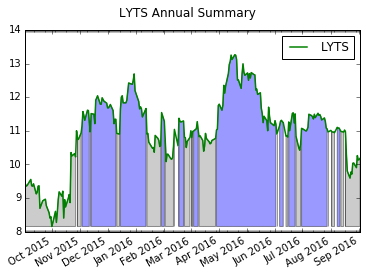

In [204]:
LYTS_DV, vol = plotStockYearShaded('LYTS')
print(vol)

0.105973999999


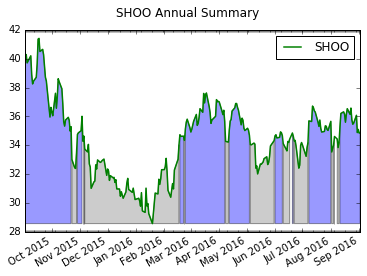

In [203]:
RDI_DV, vol = plotStockYearShaded('SHOO')
print(vol)

In [211]:
data.loc[data.industry == 'Hotels/Resorts']

,Symbol,Name,LastSale,MarketCap,IPOyear,Sector,industry,Summary Quote,averagePrice,volatility
305,CACQ,Caesars Acquisition Company,12.17,$1.67B,n/a,Consumer Services,Hotels/Resorts,http://www.nasdaq.com/symbol/cacq,8.02,-0.68
306,CZR,Caesars Entertainment Corporation,6.23,$915.33M,2012,Consumer Services,Hotels/Resorts,http://www.nasdaq.com/symbol/czr,7.48,-1.03
393,HTHT,"China Lodging Group, Limited",45,$2.82B,2010,Consumer Services,Hotels/Resorts,http://www.nasdaq.com/symbol/htht,32.31,-0.74
581,ERI,"Eldorado Resorts, Inc.",14.11,$664.24M,n/a,Consumer Services,Hotels/Resorts,http://www.nasdaq.com/symbol/eri,11.65,-0.48
1056,ISLE,"Isle of Capri Casinos, Inc.",17.26,$712.41M,n/a,Consumer Services,Hotels/Resorts,http://www.nasdaq.com/symbol/isle,16.02,-0.95
1211,MAR,Marriott International,71.13,$18.1B,n/a,Consumer Services,Hotels/Resorts,http://www.nasdaq.com/symbol/mar,68.94,-1.09
1236,MPEL,Melco Crown Entertainment Limited,13.94,$5576,2006,Consumer Services,Hotels/Resorts,http://www.nasdaq.com/symbol/mpel,15.32,0.71
1276,MCRI,"Monarch Casino & Resort, Inc.",23.63,$409.19M,1993,Consumer Services,Hotels/Resorts,http://www.nasdaq.com/symbol/mcri,20.87,0.03
1454,PENN,"Penn National Gaming, Inc.",14.14,$1.18B,1994,Consumer Services,Hotels/Resorts,http://www.nasdaq.com/symbol/penn,15.57,-0.89
1474,PNK,"Pinnacle Entertainment, Inc.",12.14,$693.57M,n/a,Consumer Services,Hotels/Resorts,http://www.nasdaq.com/symbol/pnk,11.09,0.036


0.0299270000013


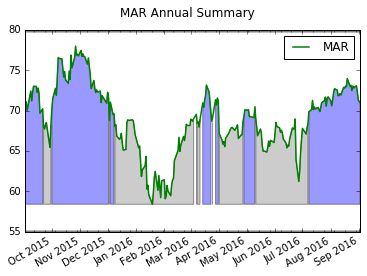

In [214]:
MAR_DV, vol = plotStockYearShaded('MAR')
print(vol)

** Code Refuses to find a negative volatility at the moment. I think there is an interpreter issue or perhaps an intermediary interference **

In [187]:
np.sum(RDI_DV)

-9.9475983006414026e-14

In [189]:
total = 0
for i in RDI_DV:
    total += i
print(total)

-9.59232693276e-14


In [192]:
data.loc[data.Symbol == 'RDI'].volatility

1564    1.14
Name: volatility, dtype: object

**Math failure again.  I'll investigate.**

In [193]:
np.sum?

In [194]:
np.sum([1, -12.12346789, 14, 0.005])

2.8815321099999993

In [195]:
total = 0
for i in [1, -12.12346789, 14, 0.005]:
    total += i
print(total)

2.8815321099999993


**#crispy**